# Movielensのデータのダウンロード

In [6]:
# MovieLensのデータセットをdataディレクトリにダウンロードして展開
!wget -nc --no-check-certificate https://files.grouplens.org/datasets/movielens/ml-10m.zip -P ../data
!unzip -n ../data/ml-10m.zip -d ../data/

--2021-11-30 00:17:51--  https://files.grouplens.org/datasets/movielens/ml-10m.zip
files.grouplens.org (files.grouplens.org) をDNSに問いあわせています... 128.101.65.152
files.grouplens.org (files.grouplens.org)|128.101.65.152|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 65566137 (63M) [application/zip]
`../data/ml-10m.zip' に保存中

ml-10m.zip          100%[===================>]  62.53M   778KB/s 時間 72s        

2021-11-30 00:19:03 (895 KB/s) - `../data/ml-10m.zip' へ保存完了 [65566137/65566137]

Archive:  ../data/ml-10m.zip
   creating: ../data/ml-10M100K/
  inflating: ../data/ml-10M100K/allbut.pl  
  inflating: ../data/ml-10M100K/movies.dat  
  inflating: ../data/ml-10M100K/ratings.dat  
  inflating: ../data/ml-10M100K/README.html  
  inflating: ../data/ml-10M100K/split_ratings.sh  
  inflating: ../data/ml-10M100K/tags.dat  


# Movielensのデータの確認

In [7]:
import pandas as pd

In [13]:
# 映画の情報の読み込み(10681作品)
# movieIDとタイトル名のみ使用
m_cols = ['movie_id', 'title', 'genre']
movies = pd.read_csv('../data/ml-10M100K/movies.dat', names=m_cols, sep='::' , encoding='latin-1', engine='python')

# genreをlist形式で保持する
movies['genre'] = movies.genre.apply(lambda x:x.split('|'))
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [14]:
# ユーザが付与した映画のタグ情報の読み込み
t_cols = ['user_id', 'movie_id', 'tag', 'timestamp']
user_tagged_movies = pd.read_csv('../data/ml-10M100K/tags.dat', names=t_cols, sep='::', engine='python')

# tagを小文字にする
user_tagged_movies['tag'] = user_tagged_movies['tag'].str.lower()

user_tagged_movies.head()

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [15]:
print(f'タグ種類={len(user_tagged_movies.tag.unique())}')
print(f'タグレコード数={len(user_tagged_movies)}')
print(f'タグが付いている映画数={len(user_tagged_movies.movie_id.unique())}')

タグ種類=15241
タグレコード数=95580
タグが付いている映画数=7601


In [16]:
# tagを映画ごとにlist形式で保持する
movie_tags = user_tagged_movies.groupby('movie_id').agg({'tag':list})

# タグ情報を結合する
movies = movies.merge(movie_tags, on='movie_id', how='left')

movies.head()

,movie_id,title,genre,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[pixar, pixar, pixar, animation, pixar, animat..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[for children, game, animals, joe johnston, ro..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[funniest movies, comedinha de velhinhos engra..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",[girl movie]
4,5,Father of the Bride Part II (1995),[Comedy],"[steve martin, pregnancy, remake, steve martin..."


In [17]:
# 評価値データの読み込み
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/ml-10M100K/ratings.dat', names=r_cols, sep='::', engine='python')
ratings.head()


,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [22]:
# データ量が多いため、ユーザー数を1000に絞って、試していく
valid_user_ids = sorted(ratings.user_id.unique())[:1000]
ratings = ratings[ratings["user_id"].isin(valid_user_ids)]
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [19]:
# 映画のデータと評価のデータを結合する
movielens = ratings.merge(movies, on='movie_id')
movielens.head()

,user_id,movie_id,rating,timestamp,title,genre,tag
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
1,139,122,3.0,974302621,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
2,149,122,2.5,1112342322,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
3,182,122,3.0,943458784,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
4,215,122,4.5,1102493547,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."


In [9]:
print(f'unique_users={len(movielens.user_id.unique())}, unique_movies={len(movielens.movie_id.unique())}')

unique_users=1000, unique_movies=6736


In [27]:
import numpy as np
# ユーザ情報
movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})

,movie_id
min,20.00
max,1668.00
mean,132.83
len,1000.00


In [29]:
# 映画情報
movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})

,user_id
min,1.000000
max,496.000000
mean,19.719418
len,6736.000000


In [30]:
print(f'評価値数={len(movielens)}')

評価値数=132830


In [35]:
movielens.groupby('rating').agg({'movie_id': len})

,movie_id
rating,
0.5,851
1.0,4847
1.5,1247
2.0,10292
2.5,3729
3.0,31706
3.5,9661
4.0,39917
4.5,6949


<AxesSubplot:xlabel='rating'>

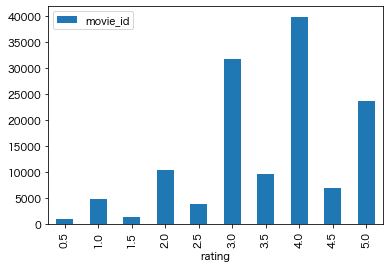

In [34]:
movielens.groupby('rating').agg({'movie_id': len}).plot.bar()

# データの分割

In [24]:
# 学習用とテスト用にデータを分割する
# 各ユーザの直近の５件の映画を評価用に使い、それ以外を学習用とする
# まずは、それぞれのユーザが評価した映画の順序を計算する
# 直近付与した映画から順番を付与していく(1始まり)

movielens['timestamp_rank'] = movielens.groupby(
    'user_id')['timestamp'].rank(ascending=False, method='first')
movielens_train = movielens[movielens['timestamp_rank'] > 5]
movielens_test = movielens[movielens['timestamp_rank']<= 5]